### 1. 데이터불러오기 
   - train.csv 파일 불러오기
   - df의 결측지 확인

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [3]:
path = './data/'
df = pd.read_csv(path + 'train.csv')

In [4]:
df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


58개 컬럼으로 데이터 프레임이 크므로 데이터 프레임을 구분해서 볼 예정!

In [5]:
# 결측지 개수보기
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

### 2. 데이터프레임 3개로 분할  
       (데이터 프레임 3개 생성)  

#### df를 3개의 데이터 프레임(df_feature, df_2017, df_2016)으로 변환

**df_feature**  
inst_id - 각 파일에서의 병원 고유 번호  
OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함  
sido – 병원의 광역 지역 정보  
sgg – 병원의 시군구 자료  
openDate – 병원 설립일  
bedCount - 병원이 갖추고 있는 병상의 수  
instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류  

**df_2017**  
2017년 회계 데이터(컬럼 명이 1로 끝남)
  
**df_2016**  
2016년 회계 데이터(컬럼 명이 2로 끝남)


In [6]:
df_feature = df[['inst_id','OC','sido','sgg','openDate','bedCount','instkind']]
df_feature.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind
0,1,open,choongnam,73,20071228,175.0,nursing_hospital
1,3,open,gyeongnam,32,19970401,410.0,general_hospital
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital
3,7,open,incheon,141,20000814,353.0,general_hospital
4,9,open,gyeongnam,32,20050901,196.0,general_hospital


In [7]:
# 2017년 회계 년도 데이터 df_feature+1로 끝나는 컬럼 
df_2017 = pd.concat([df_feature, df.filter(regex='[1]$')], axis =1) # cbind
df_2017.head()

# 32개 칼럼 확인!

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,employee1
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,62.0
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,234.0
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,663.0
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,206.0


In [8]:
# 2017년 회계 년도 데이터 df_feature+1로 끝나는 컬럼 
df_2016 = pd.concat([df_feature, df.filter(regex='[2]$')], axis =1) # cbind
df_2016.head()

# 32개 칼럼 확인!

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue2,salescost2,sga2,...,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee2
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.297848e+09,0.0,4.057422e+09,...,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,64.0
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813.0
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
3,7,open,incheon,141,20000814,353.0,general_hospital,6.685834e+10,0.0,6.492419e+10,...,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.808280e+10,0.0,4.712580e+10,...,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,197.0


### 3. 데이터 수치 확인
    df_feature, df_2017, df_2016 요약통계량 확인
    df_feature 변수 별 빈도 수 확인
    df_feature, df_2017, df_2016 상관계수 확인
    df_feature의 target변수 ('OC')가 0인(폐업인 병원) 데이터로 새로운 데이터프레임 df_close 생성

### df_feature 파악하기

In [9]:
df_feature['bedCount'].describe()

count    296.000000
mean     145.709459
std      118.923890
min        0.000000
25%       52.750000
50%      136.500000
75%      193.000000
max      656.000000
Name: bedCount, dtype: float64

In [10]:
df_feature['bedCount'].isnull().sum()

5

In [11]:
# 범주형 변수 count 
column = ['OC','sido','instkind']
df[column].describe(include=[object])


,OC,sido,instkind
count,301,301,300
unique,2,16,7
top,open,gyeonggi,nursing_hospital
freq,286,49,144


In [12]:
# 범주형 변수 count 
column = ['OC','sido','instkind']
for i in column:
    print('###### ', i,' ######')
    print(df[i].value_counts()) # .value_counts()
    print('\n')

######  OC  ######
open      286
 close     15
Name: OC, dtype: int64


######  sido  ######
gyeonggi     49
gyeongbuk    39
gyeongnam    35
busan        26
choongnam    23
jeonnam      21
seoul        19
jeonbuk      18
daegu        14
choongbuk    13
daejeon      13
incheon      10
gangwon      10
ulsan         8
gwangju       2
sejong        1
Name: sido, dtype: int64


######  instkind  ######
nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64




## sido는 클래스도 불균형이라서 변수에서 제외할 예정
## 병원 종류
- 치과 의원(1) 제외
- 요양 병원과 병원/의원 분리
- 한의원도 분리

### 4. 전처리
   - df_feature의 변수 'inst_id' 제거
   - df_feature의 모든 결측치 'nan'으로 처리
   - df_feature의 변수 'OC'를 값을 'open'은 0으로 'close'는 1로 변환 ('close'가 ' close'로 입력되있음) : **oc_flg 생성**
   - df_feature의 변수 'openDate'의 년도에 해당하는 부분만 추출하여 새로운 변수 'date_year'생성 ex) 20170817 -> 2017

###  결측치 제거

In [13]:
# 분석에 필요없는 병원ID 제거 
df_feature=df_feature.drop(columns='inst_id')
df_feature.head()

,OC,sido,sgg,openDate,bedCount,instkind
0,open,choongnam,73,20071228,175.0,nursing_hospital
1,open,gyeongnam,32,19970401,410.0,general_hospital
2,open,gyeonggi,89,20161228,468.0,nursing_hospital
3,open,incheon,141,20000814,353.0,general_hospital
4,open,gyeongnam,32,20050901,196.0,general_hospital


### 병원 종류별 침상 보기

In [14]:
df_feature.groupby("instkind").max()

,OC,sido,sgg,openDate,bedCount
instkind,,,,,
clinic,open,seoul,167,20160526,29.0
dental_clinic,open,seoul,79,20120501,0.0
general_hospital,open,ulsan,169,20160531,545.0
hospital,open,ulsan,177,20160826,311.0
nursing_hospital,open,ulsan,178,20170607,656.0
traditional_clinic,open,gyeonggi,98,20170420,0.0
traditional_hospital,open,seoul,114,20140514,69.0


In [15]:
df_feature.groupby("instkind").median()

,sgg,openDate,bedCount
instkind,,,
clinic,73.5,20065727.5,0.0
dental_clinic,79.0,20120501.0,0.0
general_hospital,81.0,19990309.0,243.0
hospital,81.5,20045952.5,72.5
nursing_hospital,68.5,20090612.5,153.5
traditional_clinic,82.5,20090670.5,0.0
traditional_hospital,53.0,20000911.0,44.0


In [16]:
# abalone['whole_weight'].groupby(abalone['sex'])

# df_feature['bedCount'].groupby(df_feature['instkind']).mean()
groupped = df_feature.groupby("instkind").mean()
groupped

,sgg,openDate,bedCount
instkind,,,
clinic,72.166667,2.004631e+07,4.444444
dental_clinic,79.000000,2.012050e+07,0.000000
general_hospital,81.567568,1.997541e+07,261.567568
hospital,85.556818,2.002256e+07,96.220930
nursing_hospital,81.291667,2.008744e+07,172.340278
traditional_clinic,72.750000,2.009049e+07,0.000000
traditional_hospital,57.375000,1.999794e+07,46.666667


In [17]:
# nan 처리
df_feature =df_feature.fillna('null')

In [18]:
df_feature[df_feature['bedCount']=='null']

,OC,sido,sgg,openDate,bedCount,instkind
71,close,jeonbuk,26,19990805,null,traditional_hospital
193,close,gyeonggi,12,20121213,null,null
297,close,choongnam,159,20140618,null,hospital
298,close,gyeongbuk,107,19830705,null,hospital
300,open,seoul,79,20011017,null,traditional_hospital


- 각 병원 별로 bedcount의 값들을 비교하고 결츨 대체
- instkind가 결측치인 값은?

# 타겟 변수 : open or close 변수 처리

In [19]:
df_feature['OC'].unique()

array(['open', ' close'], dtype=object)

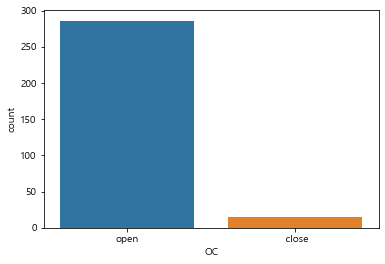

In [20]:
g = sns.countplot(x = 'OC', data = df_feature)

In [21]:
df_feature['OC'].value_counts()

open      286
 close     15
Name: OC, dtype: int64

In [22]:
df_feature['OC'].replace({'open':'0', ' close':'1'}, inplace =True)

In [23]:
df_feature['OC'].value_counts()

0    286
1     15
Name: OC, dtype: int64

클래스 불균형이 존재함 -> 어떻게 처리??

### 오픈 날짜 칼럼 만들기

In [24]:
#temp = df_feature.astype({'openDate':'str'})
# df_feature["open_year"] = temp['openDate'].str[:4]

df_feature['open_year'] = df_feature['openDate'].apply(lambda x: str(x)[:4])

In [25]:
df_feature['open_year']

0      2007
1      1997
2      2016
3      2000
4      2005
       ... 
296    2005
297    2014
298    1983
299    2007
300    2001
Name: open_year, Length: 301, dtype: object

### 5. 시각화
    df_featured의 범주형 변수 ('open_year', 'sido', 'instkind') 각각 countplot 그려보기
    df_feauter의 연속형 변수 ('bedCount') distplot 그려보기

    df_feature heatmap 그려보기
    df_2017 heatmap 그려보기
    df_2016 heatmap 그려보기
    
    위에서 그린 각각의 countplot에 hue옵션으로 target변수 'OC' 추가하여 그려보기
    df_feature의 target변수('OC')가 각각 open인 distplot, close인 distplot 겹쳐서 그려보기

#### 오픈 년도 데이터 countplot

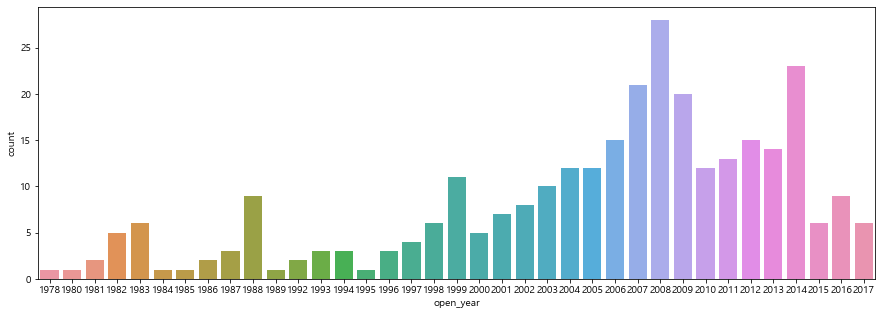

In [26]:
plt.figure(figsize=(15,5))
sns.countplot('open_year', data = df_feature)

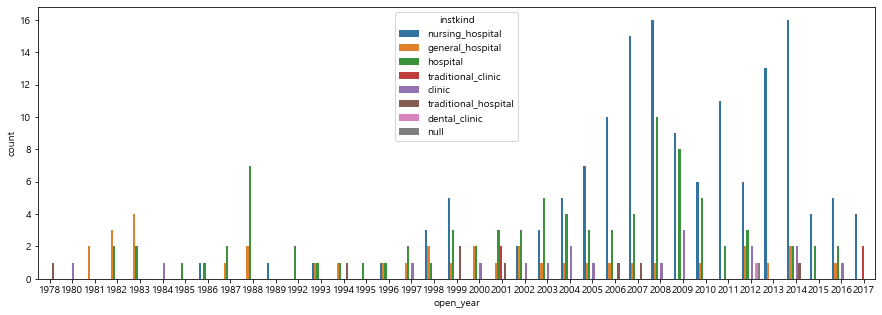

In [27]:
plt.figure(figsize=(15,5))
sns.countplot('open_year', data = df_feature, hue='instkind')

* 2005년 이후부터 요양병원 개원 수가 급증
* 1980년대에 general_hospital과 hospital 갸원수가 많음
* 2008년 ~2009년에도 hospital 개원 수가 증가

Text(0.5, 1.0, '<개업 년도_요양병원>\n')

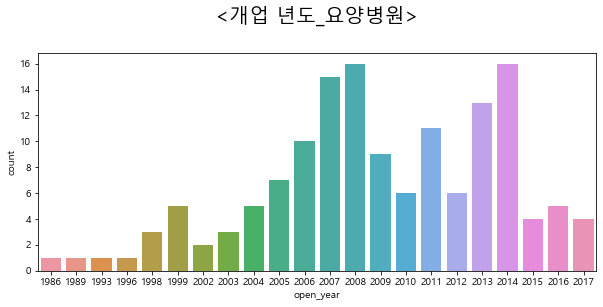

In [28]:
plt.figure(figsize=(10,4))
ax = sns.countplot('open_year', data = df_feature.loc[df_feature['instkind']=='nursing_hospital'])
ax.set_title('<개업 년도_요양병원>\n', fontsize = 20)

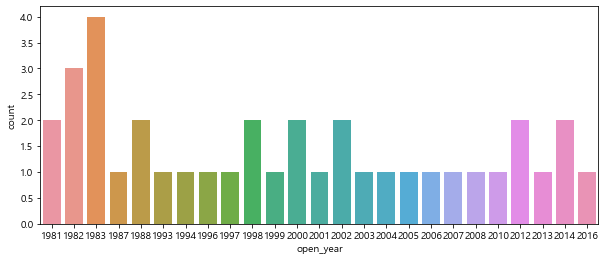

In [29]:
plt.figure(figsize=(10,4))
ax = sns.countplot('open_year', data = df_feature.loc[df_feature['instkind']=='general_hospital'])

Text(0.5, 1.0, '<개업 년도_일반병원>\n')

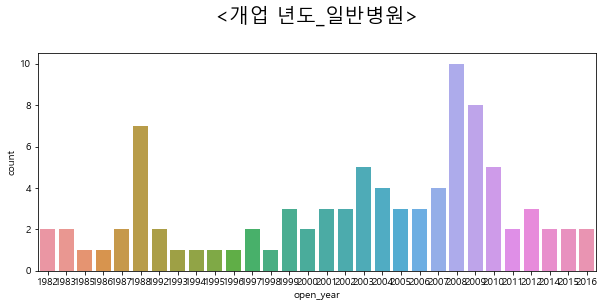

In [30]:
plt.figure(figsize=(10,4))
ax =sns.countplot('open_year', data = df_feature.loc[df_feature['instkind']=='hospital'])
ax.set_title('<개업 년도_일반병원>\n', fontsize = 20)

- 요양병원과 일반 병원의 개업 년도가 유의미
- 2008년, 2013년 전후에 병원의 수 증가

### df_feature 별 barplot

In [31]:
def feature_barplot(df, col):
    val = df[col].value_counts().values
    idx = df[col].value_counts().index

    sr_date_year = pd.Series(val, index=idx)

    plt.figure(figsize=(10,4))
    sns.barplot(x=sr_date_year.values, y=sr_date_year.index)
    plt.show()

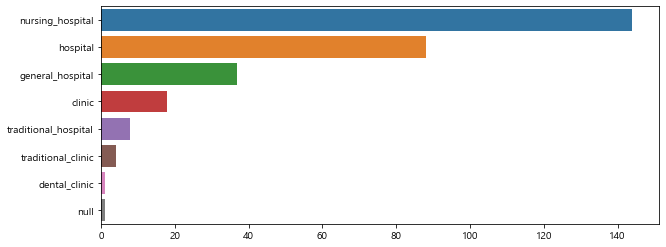

In [32]:
feature_barplot(df_feature, 'instkind')

요양병원의 수가 가장 많다

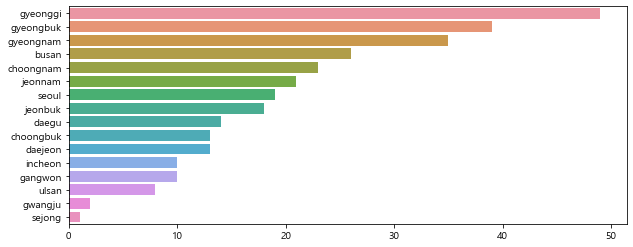

In [33]:
feature_barplot(df_feature, 'sido')

### bed count 히스토그램 그리기

In [45]:
df_feature['bedCount']= pd.to_numeric(df_feature['bedCount'], errors = 'coerce')
df_feature['bedCount'].fillna(0, inplace = True)
df_feature['bedCount']

0      175.0
1      410.0
2      468.0
3      353.0
4      196.0
       ...  
296    214.0
297      0.0
298      0.0
299    180.0
300      0.0
Name: bedCount, Length: 301, dtype: float64

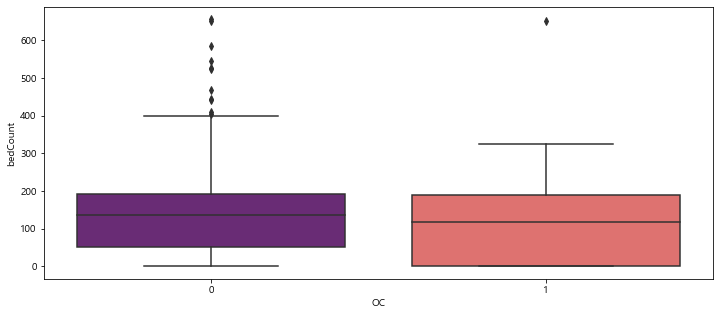

In [46]:
plt.figure(figsize=(12,5))
sns.boxplot(x='OC', y='bedCount', data=df_feature, palette='magma')
plt.show()

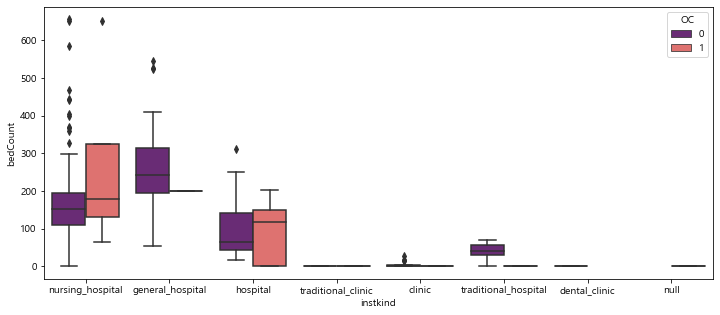

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot('instkind', 'bedCount', hue='OC',data=df_feature, palette='magma')
plt.show()

* 병원 마다 병상 수의 차이가 크다는 것을 볼 수 있다. 
* nursing hospital의 이상값이 크다
* close가 nursing_hosipital과 hospital에만 존재한다.

## Heatmap 그리기
#### df_feature heatmap 그려보기


In [50]:
df_2017.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'employee1'],
      dtype='object')

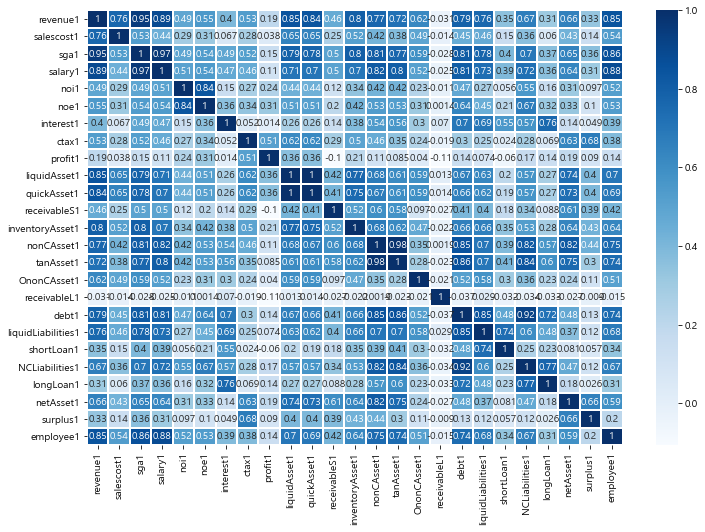

In [51]:
columns = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'employee1']

data = df_2017[columns].corr()
plt.figure(figsize = (12,8))
sns.heatmap(data, annot =True, cmap = 'Blues', linewidth = 1)

C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


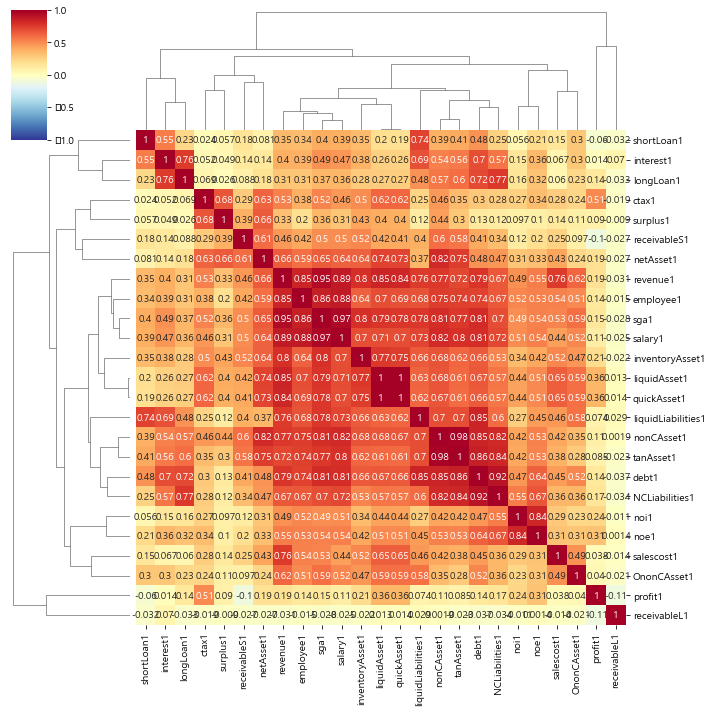

In [52]:
data = df_2017[columns].corr()

sns.clustermap(data, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


#### df_2016 heatmap 그려보기

In [53]:
df_2016.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee2'],
      dtype='object')

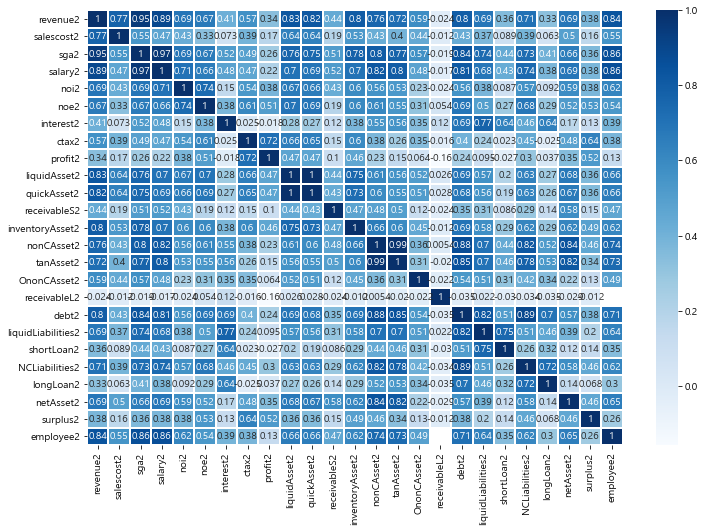

In [54]:
columns_2016 = ['revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee2']

plt.figure(figsize = (12,8))
sns.heatmap(df_2016[columns_2016].corr(), annot =True, cmap = 'Blues', linewidth = 1)

####  countplot에 hue옵션으로 target변수 'OC' 추가하여 그려보기
df_feature의 target변수('OC')가 각각 open인 distplot, close인 distplot 겹쳐서 그려보기

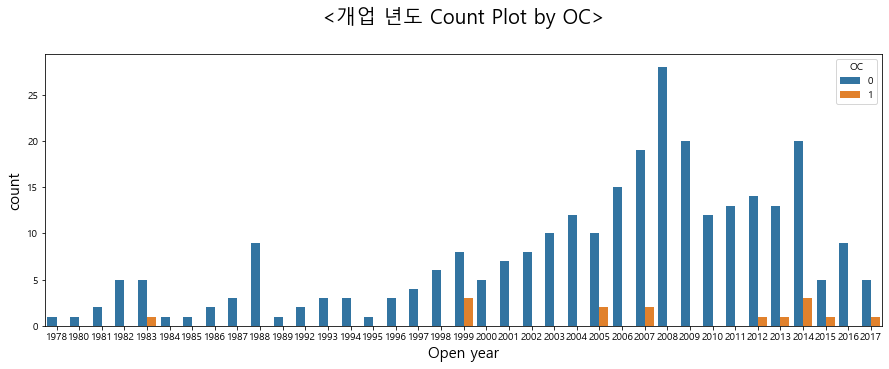

In [55]:
# count 개수대로 정렬
plt.figure(figsize=(15,5))
g = sns.countplot('open_year', data = df_feature, hue = 'OC')
g.set_title('<개업 년도 Count Plot by OC>\n', fontsize = 20)
g.set_xlabel('Open year', fontsize = 15)
#g.xticks(ticks=year_lst,labels=year_lst, rotation=90,fontsize=10)
#g.set_xticklabels(df_feature.open_year, rotation = 90)
g.set_ylabel('count', fontsize = 15)
plt.show()

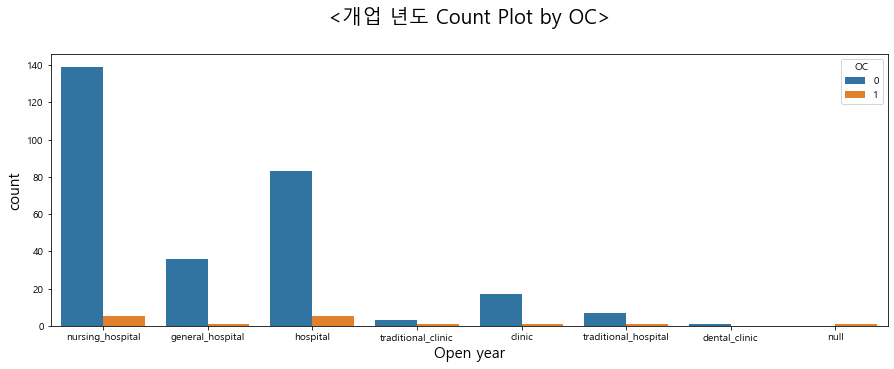

In [56]:
# count 개수대로 정렬
plt.figure(figsize=(15,5))
g = sns.countplot('instkind', data = df_feature, hue = 'OC')
g.set_title('<개업 년도 Count Plot by OC>\n', fontsize = 20)
g.set_xlabel('Open year', fontsize = 15)
#g.xticks(ticks=year_lst,labels=year_lst, rotation=90,fontsize=10)
#g.set_xticklabels(df_feature.open_year, rotation = 90)
g.set_ylabel('count', fontsize = 15)
plt.show()

### 해결해야 할 문제점
* close가 open에 비해 너무 적음...
* 병원 종류 별 특징도 너무 다름
* close가 없는 병원 종류는 어떻게 처리해야 할지...